In [3]:
import opendatasets as od
import shutil
import pandas as pd
pd.set_option('display.max_column', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
od.download(dataset_id_or_url='https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing')

Skipping, found downloaded files in ".\bank-marketing" (use force=True to force download)


In [5]:
#copy file
shutil.copyfile('bank-marketing/bank-additional-full.csv', 'bank-additional-full.csv')

'bank-additional-full.csv'

In [6]:
raw_df = pd.read_csv('bank-additional-full.csv', sep=';')
display(raw_df.head(5))
raw_df.info()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
raw_df.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [8]:
raw_df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [9]:
listNumCols = raw_df.describe(exclude='object').columns.to_list()

Input variables:  
   # bank client data:  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - default: has credit in default? (categorical: "no","yes","unknown")  
   6 - housing: has housing loan? (categorical: "no","yes","unknown")  
   7 - loan: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - contact: contact communication type (categorical: "cellular","telephone")   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)       
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)       
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
  20 - nr.employed: number of employees - quarterly indicator (numeric)  
  
  Output variable (desired target):  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")  
  
8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.   


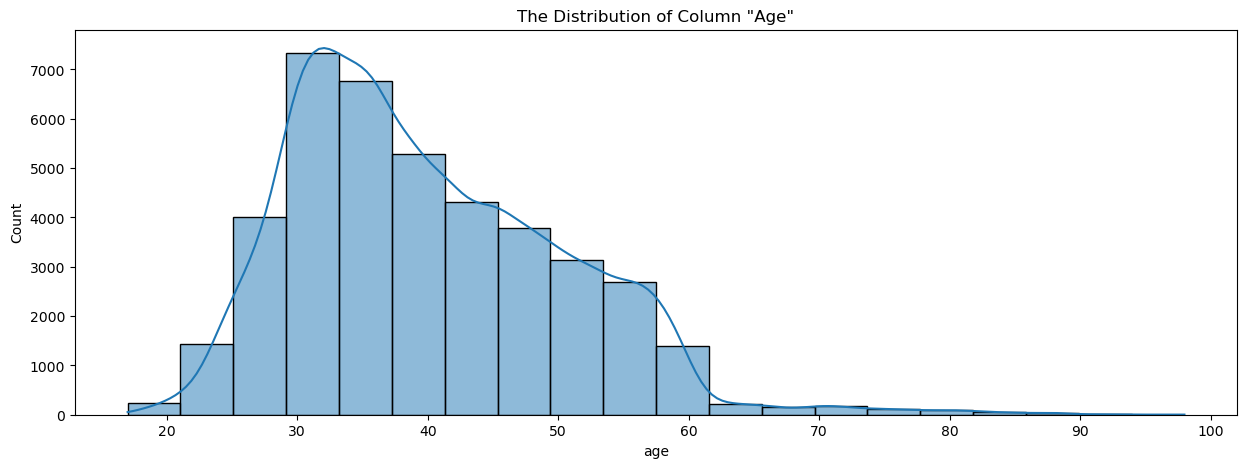

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Age,41188.0,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0,0.784697,16149,39.208022


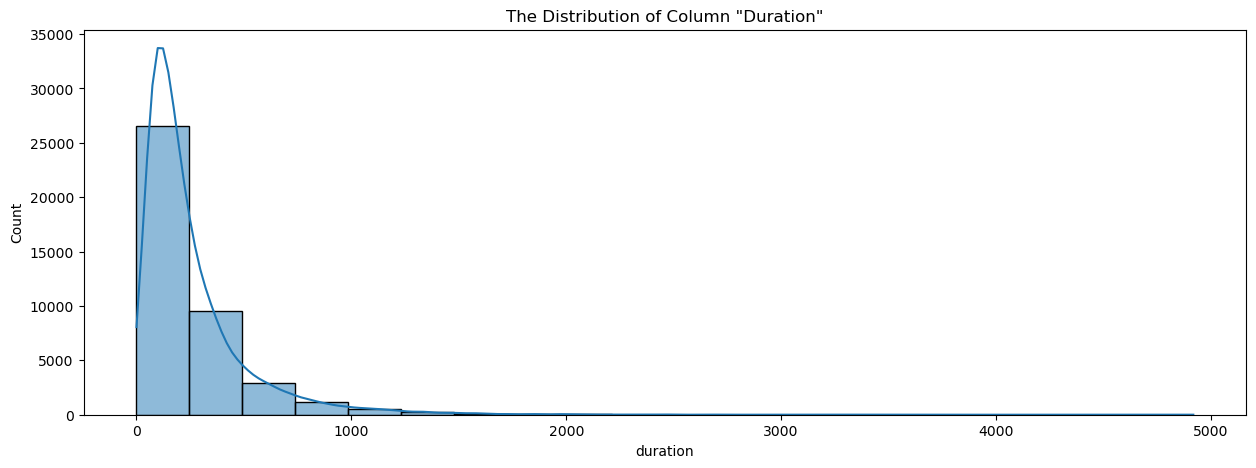

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Duration,41188.0,258.28501,259.279249,0.0,102.0,180.0,319.0,4918.0,3.263141,17722,43.027095


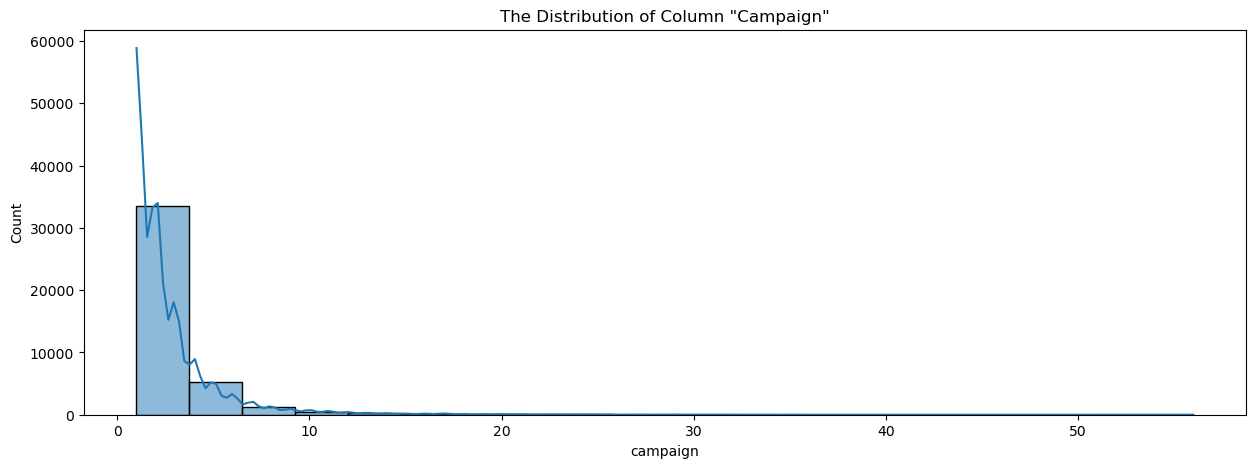

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Campaign,41188.0,2.567593,2.770014,1.0,1.0,2.0,3.0,56.0,4.762507,12976,31.504322


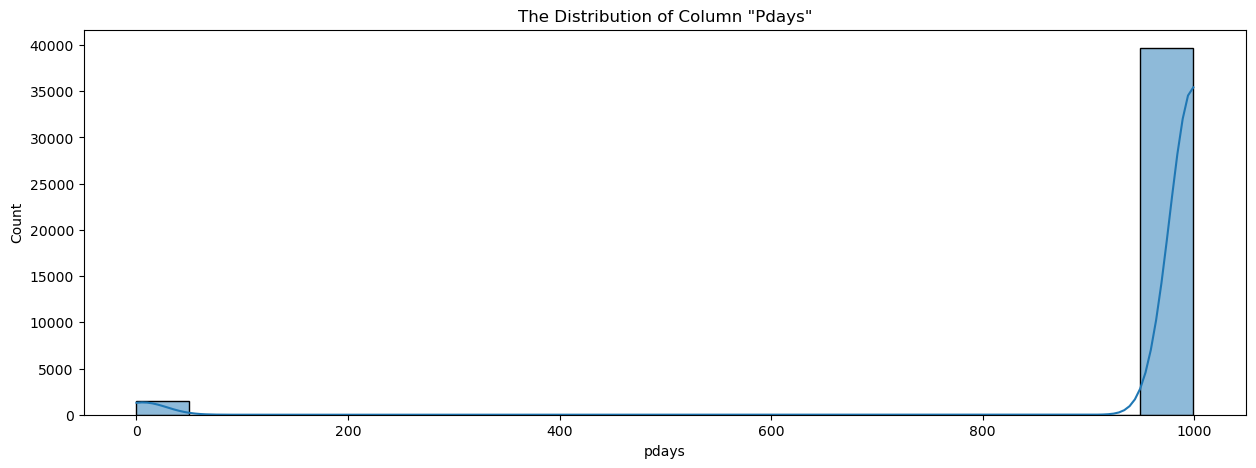

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Pdays,41188.0,962.475454,186.910907,0.0,999.0,999.0,999.0,999.0,-4.92219,1515,3.678256


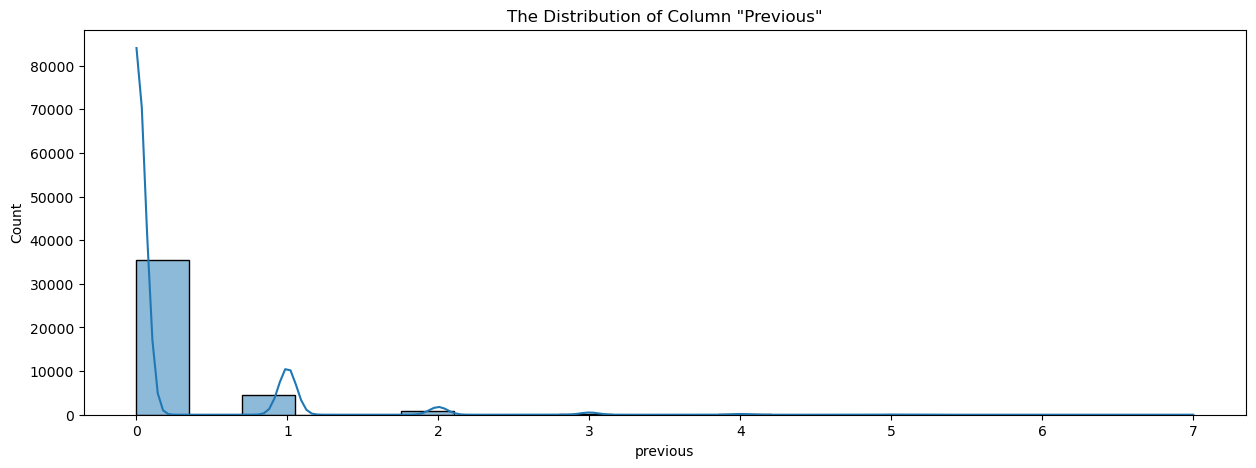

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Previous,41188.0,0.172963,0.494901,0.0,0.0,0.0,0.0,7.0,3.832042,5625,13.65689


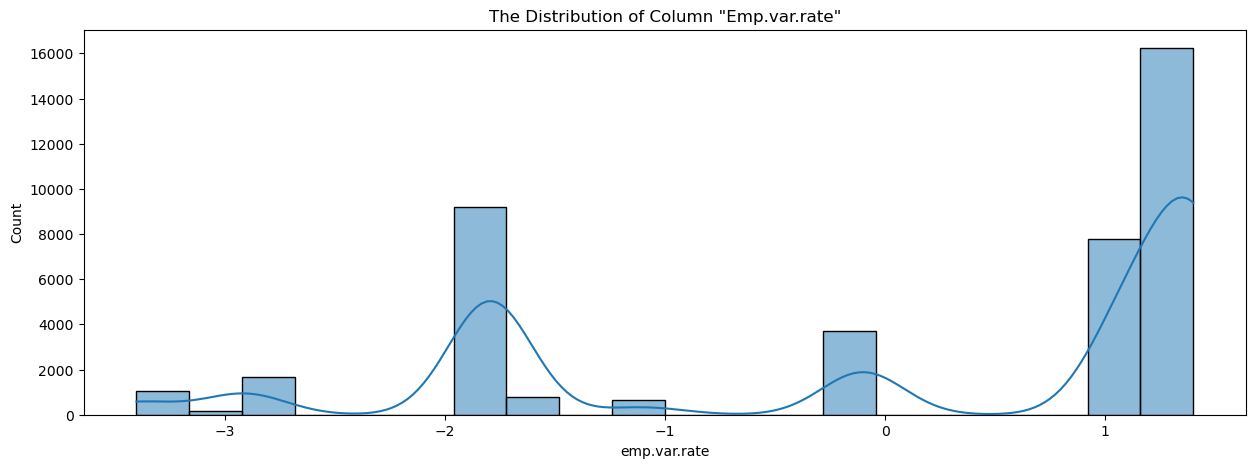

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Emp.var.rate,41188.0,0.081886,1.57096,-3.4,-1.8,1.1,1.4,1.4,-0.724096,1071,2.600272


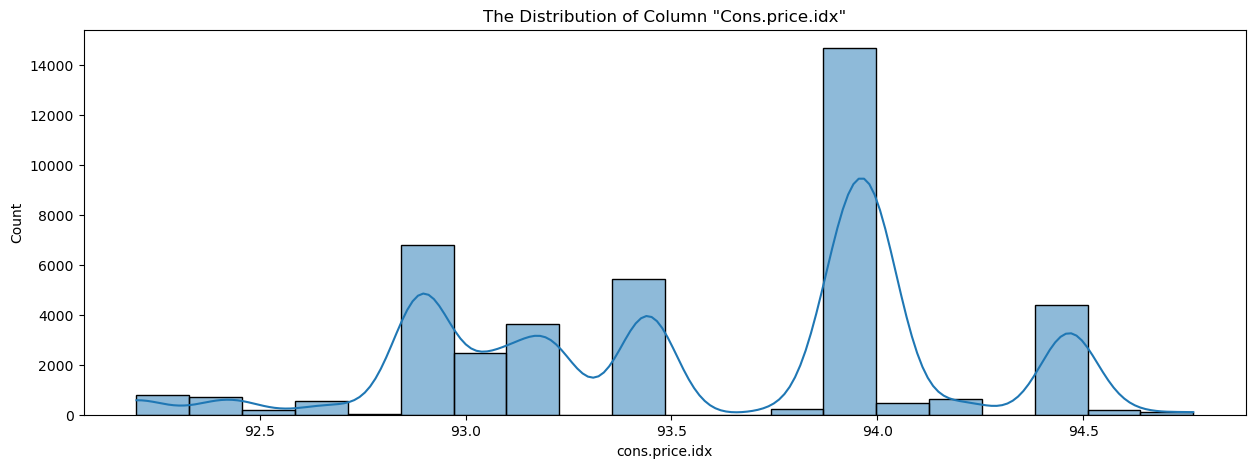

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Cons.price.idx,41188.0,93.575664,0.57884,92.201,93.075,93.749,93.994,94.767,-0.230888,0,0.0


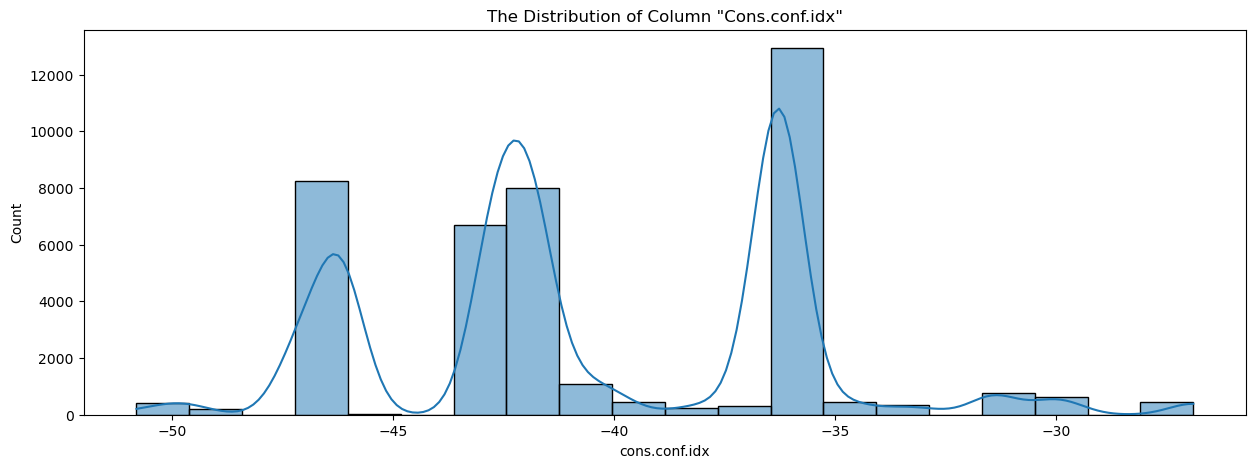

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Cons.conf.idx,41188.0,-40.5026,4.628198,-50.8,-42.7,-41.8,-36.4,-26.9,0.30318,0,0.0


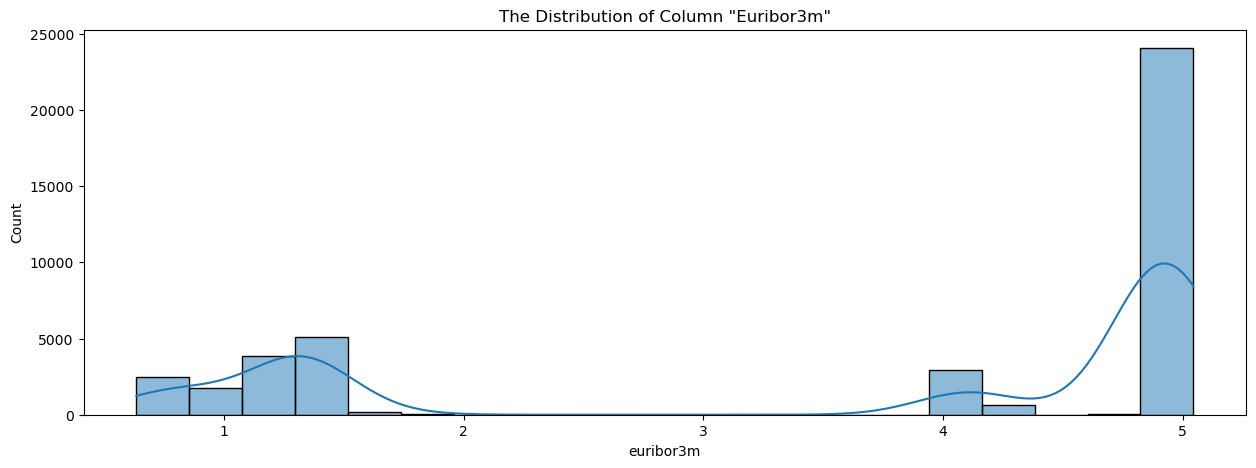

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045,-0.709188,0,0.0


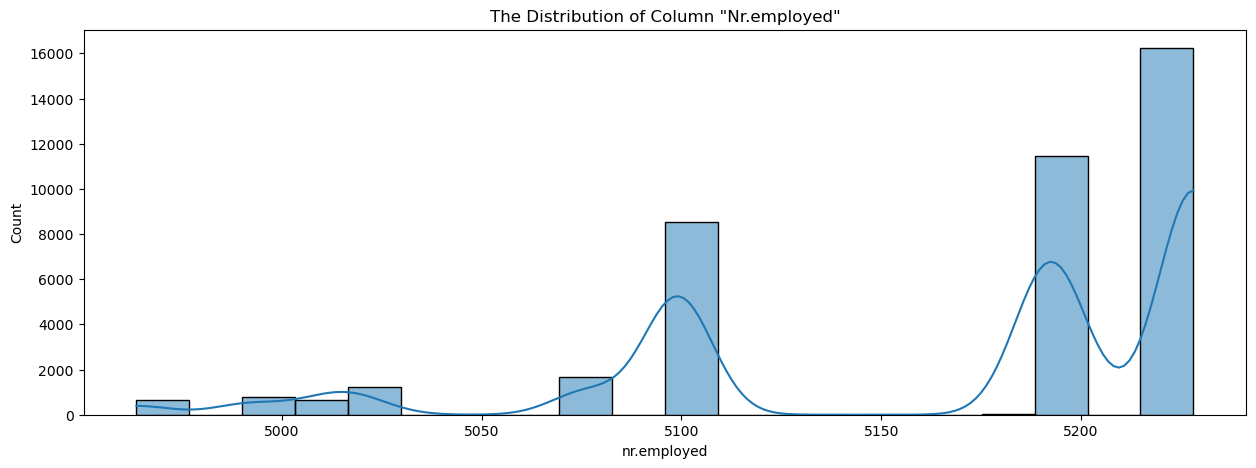

,count,mean,std,min,25%,50%,75%,max,skew,outliers,perc_outliers
Nr.employed,41188.0,5167.035911,72.251528,4963.6,5099.1,5191.0,5228.1,5228.1,-1.044262,3301,8.01447


In [10]:
for idx in range(len(listNumCols)):
    col = listNumCols[idx]
    skew = raw_df[col].skew()
    mean = raw_df[col].mean()
    median = raw_df[col].median()
    stdv = raw_df[col].std()
    q1 = raw_df[col].quantile(0.25)
    q3 = raw_df[col].quantile(0.55)
    iqr = q3-q1
    countNOut = 0
    
    if skew >= -0.5 and skew <= 0.5:
        lower = mean - (3 * stdv)
        upper = mean + (3 * stdv)
        nonOutliers_df = raw_df[(raw_df[col] >= lower) & (raw_df[col] <= upper)]
        countNOut = len(nonOutliers_df)
    else:
        lower = q3 - (1.5 * iqr)
        upper = q1 + (1.5 * iqr)
        nonOutliers_df = raw_df[(raw_df[col] >= lower) & (raw_df[col] <= upper)]
        countNOut = len(nonOutliers_df)
    
    plt.figure(figsize=(15,5))
    sns.histplot(data=raw_df[col], kde=True, bins=20)
    plt.title(f'The Distribution of Column "{col.capitalize()}"')
    plt.show()
    frame = raw_df[col].describe().to_frame(name=f'{col.capitalize()}').T
    frame['skew'] = [skew]
    frame['outliers'] = [len(raw_df) - countNOut]
    frame['perc_outliers'] = [((len(raw_df) -countNOut) * 100)/len(raw_df)]
    display(frame)
    # print(frame.T.columns)

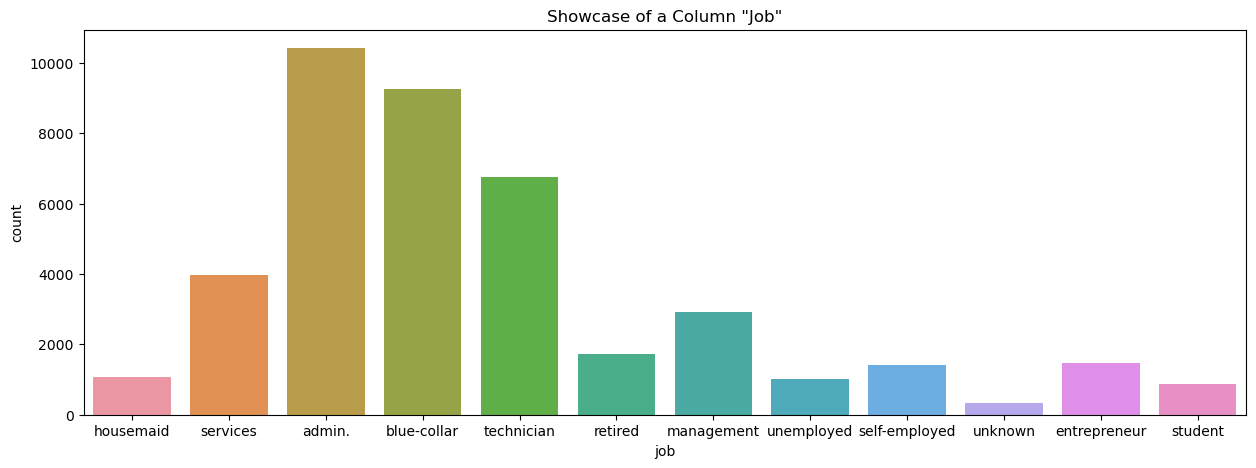

categories,housemaid,services,admin.,blue-collar,technician,retired,management,unemployed,self-employed,unknown,entrepreneur,student
count,1060.000000,3969.000000,10422.000000,9254.000000,6743.000000,1720.000000,2924.000000,1014.000000,1421.000000,330.000000,1456.00000,875.000000
perc_count,2.573565,9.636302,25.303486,22.467709,16.371273,4.175974,7.099155,2.461882,3.450034,0.801204,3.53501,2.124405


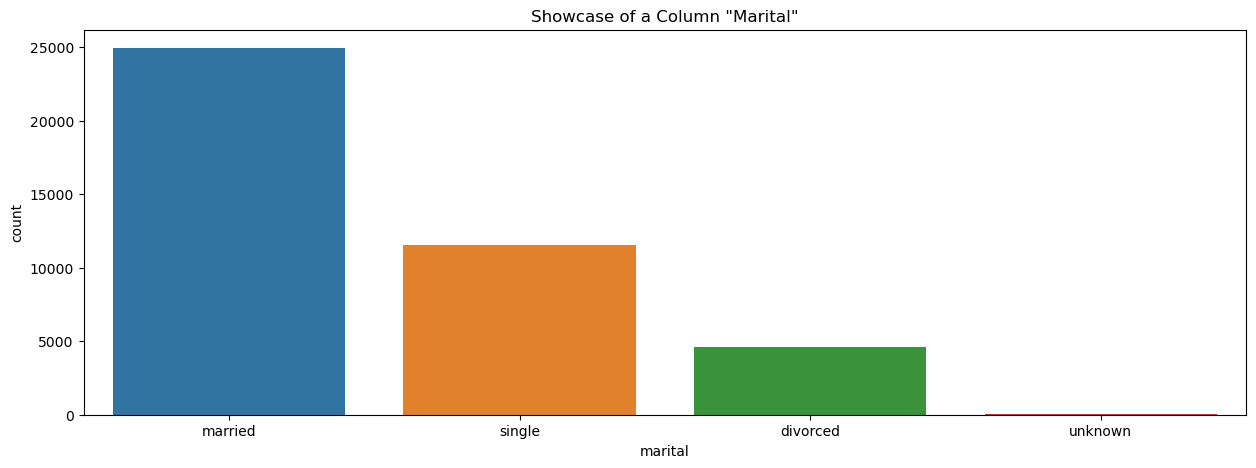

categories,married,single,divorced,unknown
count,24928.000000,11568.00000,4612.000000,80.000000
perc_count,60.522482,28.08585,11.197436,0.194231


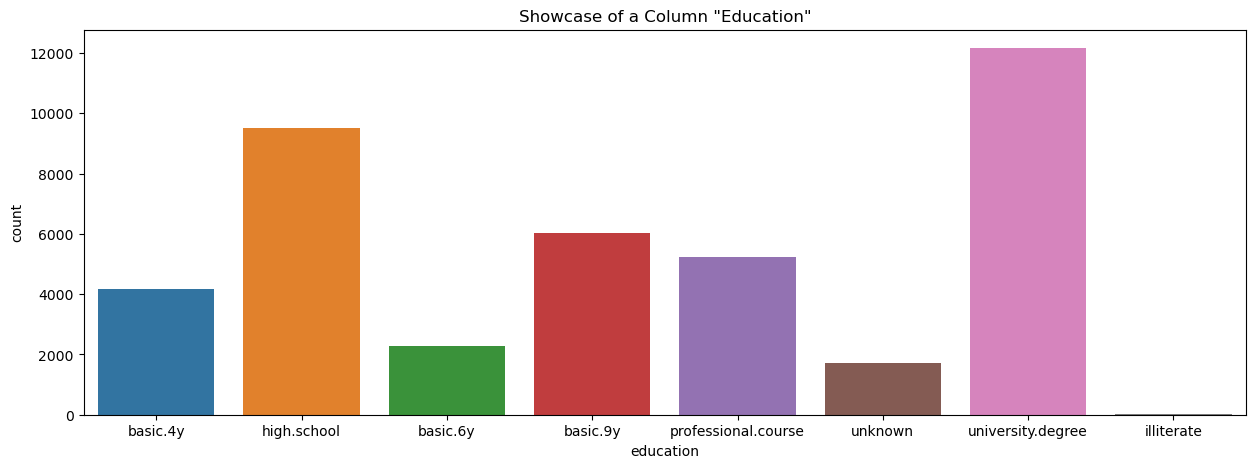

categories,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
count,4176.000000,9515.000000,2292.000000,6045.000000,5243.000000,1731.00000,12168.000000,18.000000
perc_count,10.138875,23.101389,5.564728,14.676605,12.729436,4.20268,29.542585,0.043702


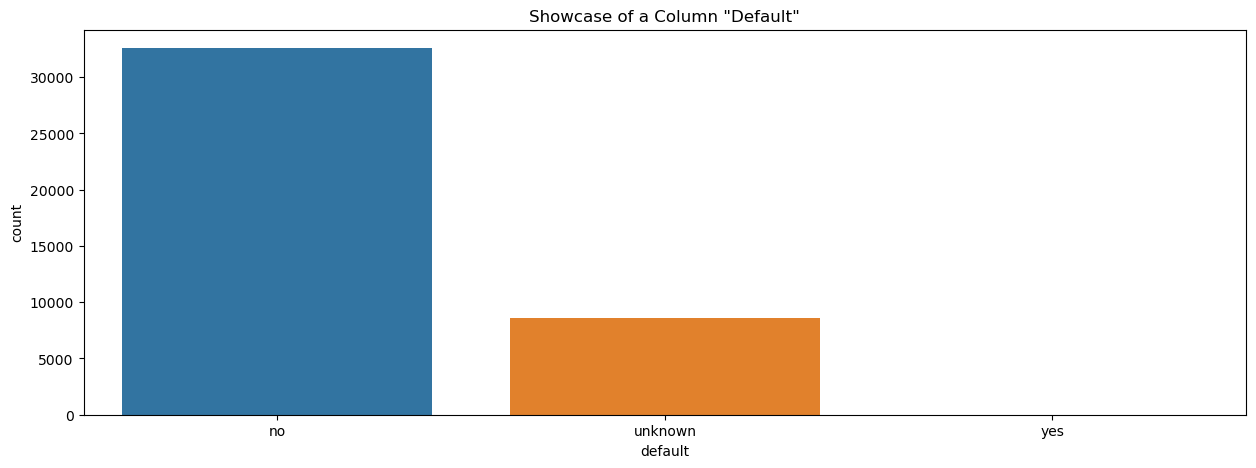

categories,no,unknown,yes
count,32588.000000,8597.000000,3.000000
perc_count,79.120132,20.872584,0.007284


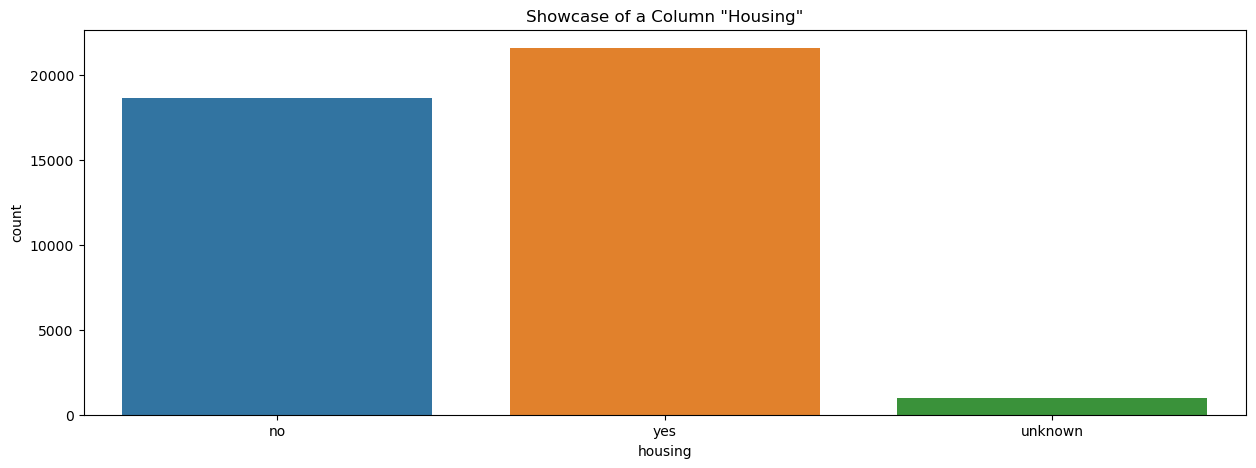

categories,no,yes,unknown
count,18622.000000,21576.00000,990.000000
perc_count,45.212198,52.38419,2.403613


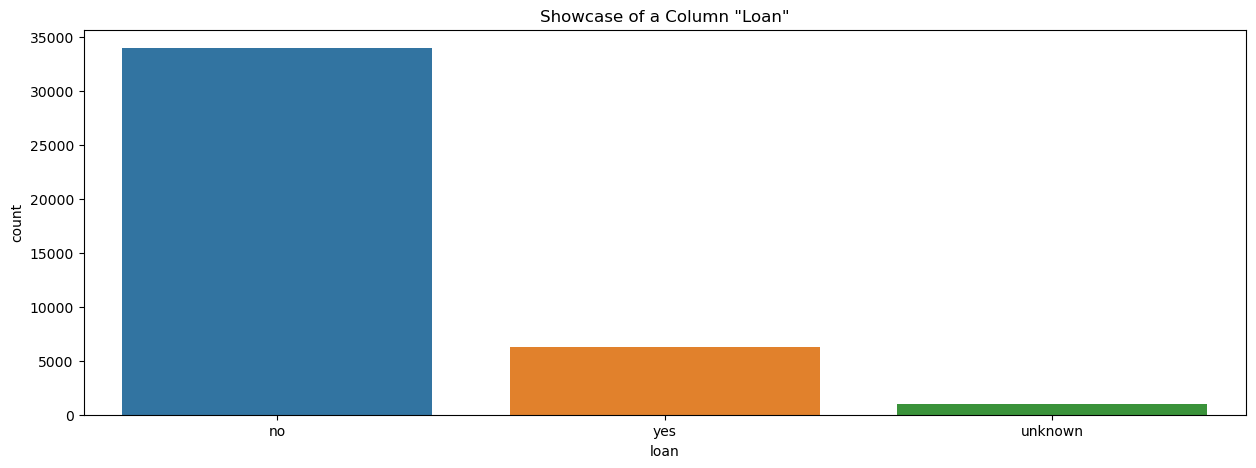

categories,no,yes,unknown
count,33950.00000,6248.000000,990.000000
perc_count,82.42692,15.169467,2.403613


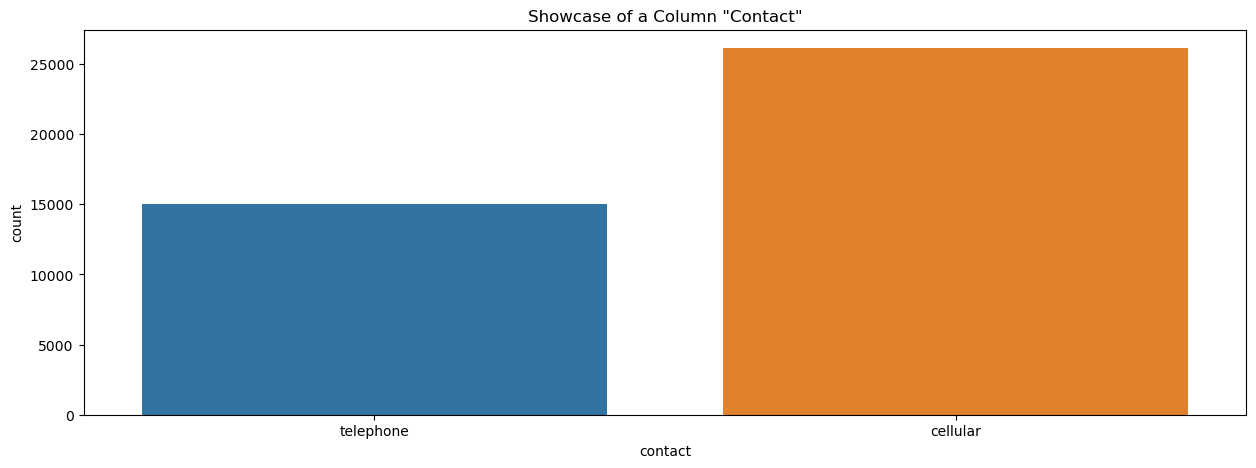

categories,telephone,cellular
count,15044.000000,26144.000000
perc_count,36.525202,63.474798


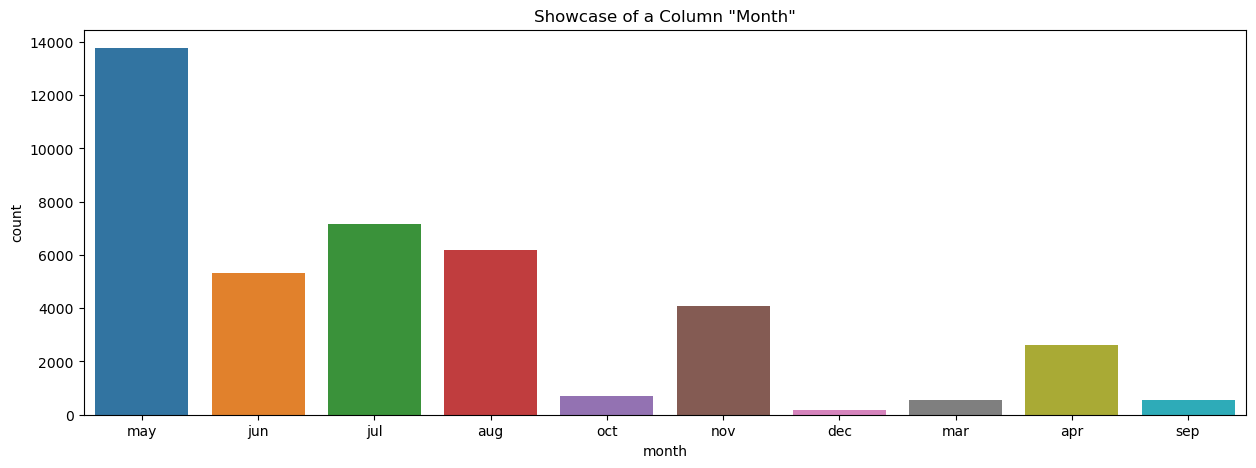

categories,may,jun,jul,aug,oct,nov,dec,mar,apr,sep
count,13769.00000,5318.000000,7174.000000,6178.000000,718.000000,4101.000000,182.000000,546.000000,2632.000000,570.000000
perc_count,33.42964,12.911528,17.417694,14.999514,1.743226,9.956784,0.441876,1.325629,6.390211,1.383898


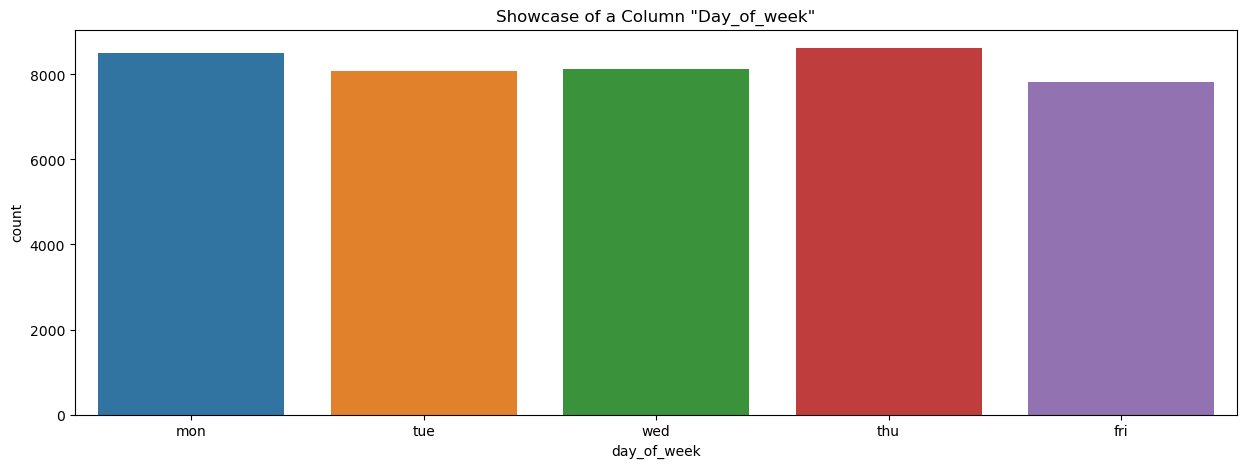

categories,mon,tue,wed,thu,fri
count,8514.000000,8090.000000,8134.00000,8623.000000,7827.000000
perc_count,20.671069,19.641643,19.74847,20.935709,19.003108


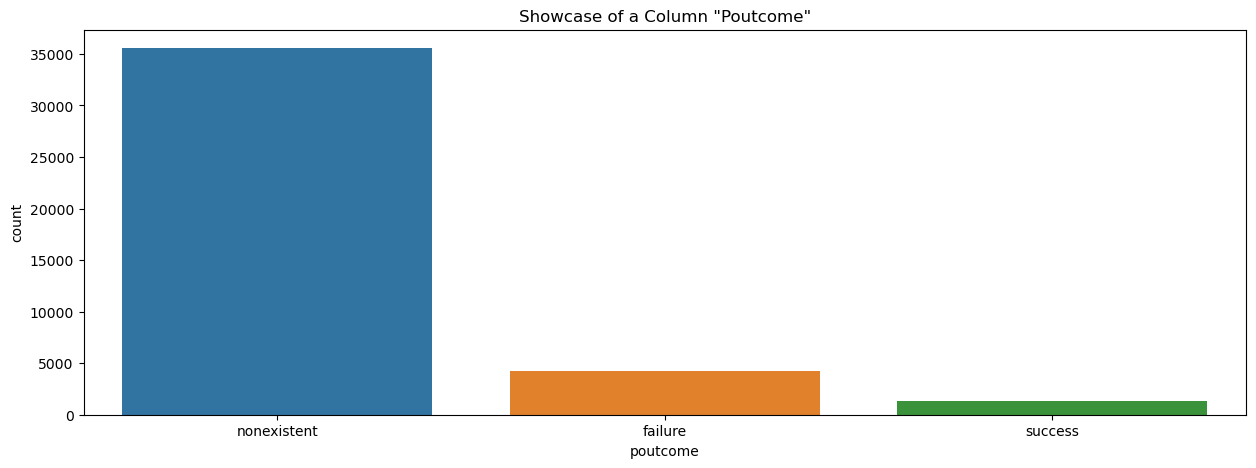

categories,nonexistent,failure,success
count,35563.00000,4252.000000,1373.000000
perc_count,86.34311,10.323395,3.333495


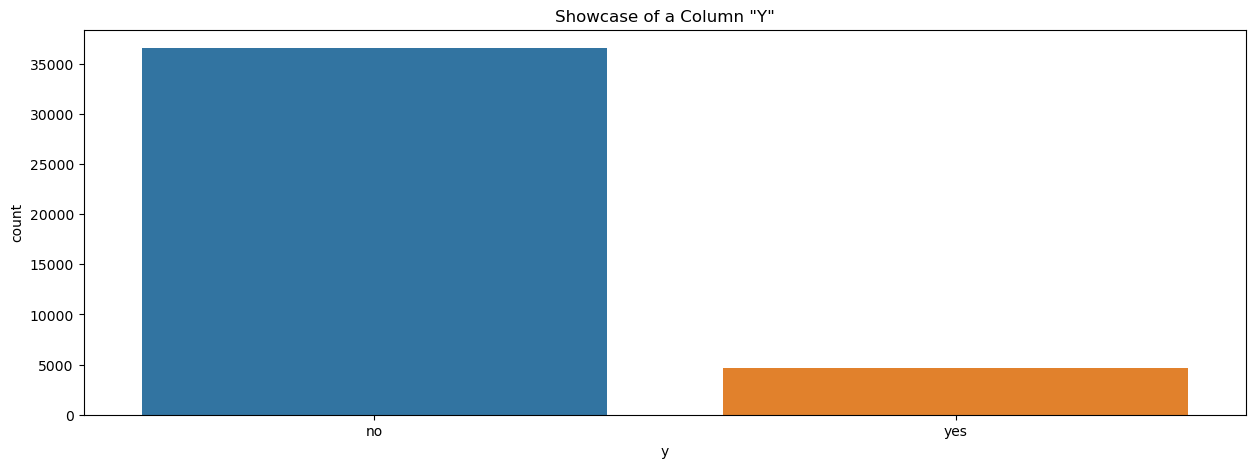

categories,no,yes
count,36548.000000,4640.000000
perc_count,88.734583,11.265417


In [11]:
listCatCols = raw_df.describe(include='object').columns.to_list()

for idx in range(len(listCatCols)):
    col = listCatCols[idx]
    listVal = raw_df[col].unique().tolist()
    plt.figure(figsize=(15,5))
    sns.countplot(data=raw_df, x=col)
    plt.title(f'Showcase of a Column "{col.capitalize()}"')
    plt.show()
    count = []
    countPerc = []
    for i in range(len(listVal)):
        countEach = len(raw_df[(raw_df[col] == listVal[i])])
        count.append(countEach)
        countPerc.append((countEach * 100)/len(raw_df))
    dataCol = pd.DataFrame(data={'categories':listVal,
                                 'count':count,
                                 'perc_count':countPerc}).astype({'count':'int','perc_count':'float'})
    # dataCol = dataCol['count'].astype(dtype='int')
    dataCol.set_index(keys='categories', inplace=True)
    display(dataCol.T)

In [163]:
# re-run update visualisasi selalu mulai dari sini 
new_df = raw_df.copy()

# Kolom Job

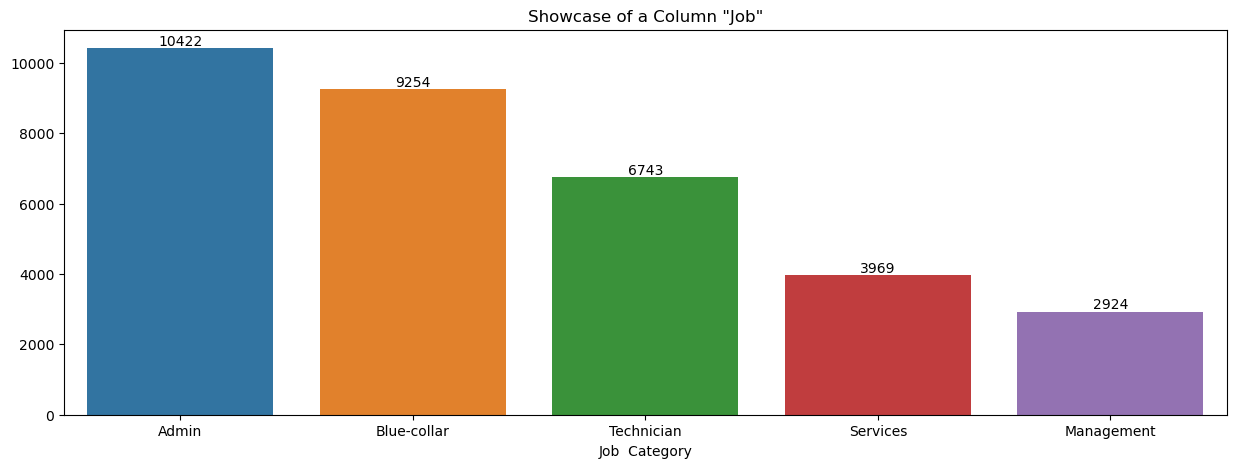

In [164]:
jobCol_categories = raw_df['job'].unique().tolist()
newJobCol_cats = []

for each in jobCol_categories:
    newEach = each.capitalize()
    newEach = newEach.replace('.','')
    newJobCol_cats.append(newEach)
    
jobColReplace_Dict = dict(zip(jobCol_categories, newJobCol_cats))

new_df['job'] = new_df['job'].replace(jobColReplace_Dict)

# visualization
jobCount = new_df['job'].value_counts().rename_axis('Job  Category').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=jobCount.index, y=jobCount.values, order=jobCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "Job"')
plt.show()

# Kolom Marital

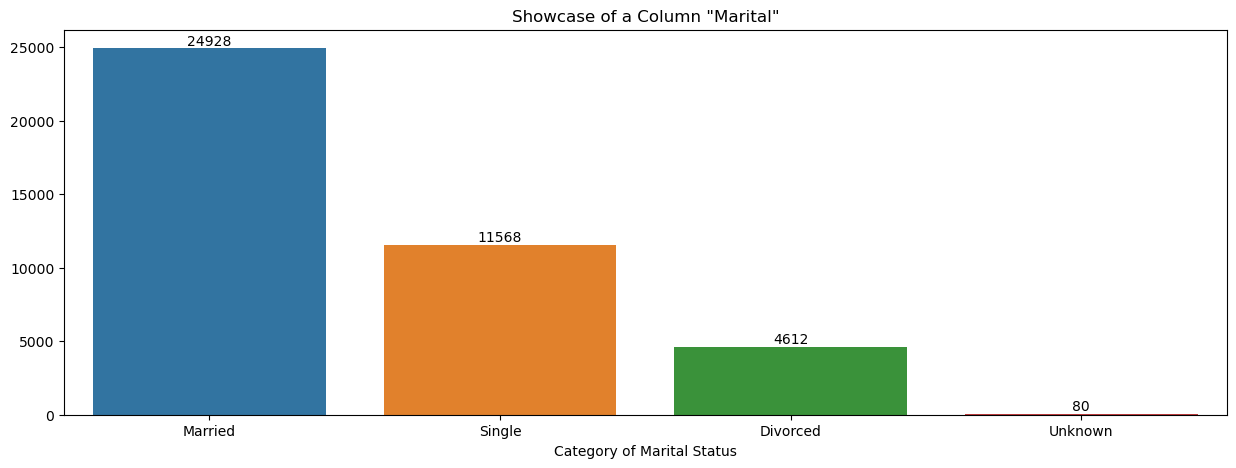

In [165]:
maritalCol_categories = raw_df['marital'].unique().tolist()
newmaritalCol_cats = []

for each in maritalCol_categories:
    newEach = each.capitalize()
    newmaritalCol_cats.append(newEach)
    
maritalColReplace_Dict= dict(zip(maritalCol_categories, newmaritalCol_cats))

new_df['marital'] = new_df['marital'].replace(maritalColReplace_Dict)

# visualization
maritalCount = new_df['marital'].value_counts().rename_axis('Category of Marital Status').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=maritalCount.index, y=maritalCount.values, order=maritalCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "Marital"')
plt.show()

# Kolom Education

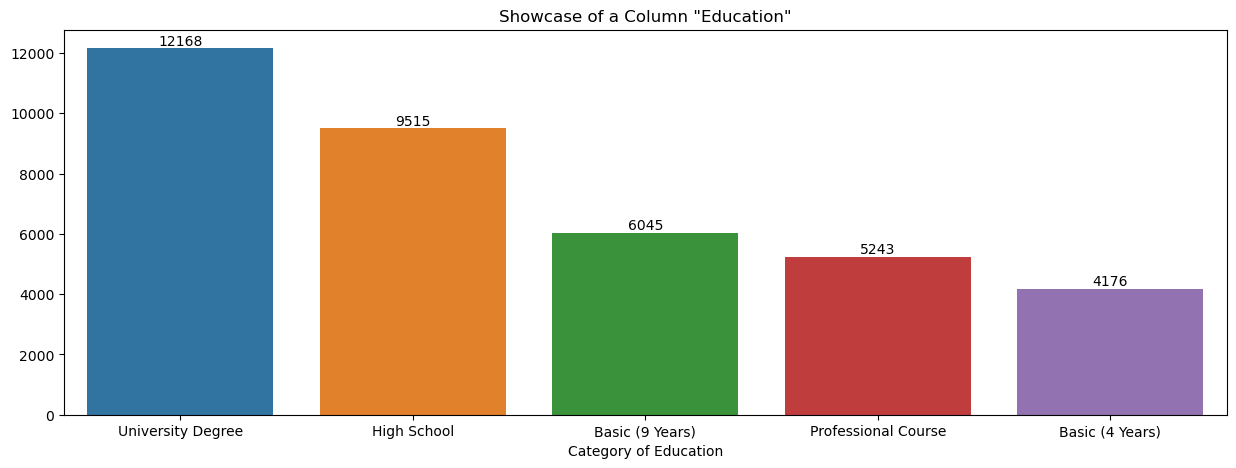

In [166]:
educationCol_categories = raw_df['education'].unique().tolist()
neweducationCol_cats = []

for each in educationCol_categories:
    newEach = each.replace('.', ' ')
    newEach = newEach.replace('4y', '(4 years)') if '4y' in newEach else newEach
    newEach = newEach.replace('6y', '(6 years)') if '6y' in newEach else newEach
    newEach = newEach.replace('9y', '(9 years)') if '9y' in newEach else newEach
    newEach = newEach.title()
    neweducationCol_cats.append(newEach)
    
educationColReplace_Dict= dict(zip(educationCol_categories, neweducationCol_cats))
new_df['education'] = new_df['education'].replace(educationColReplace_Dict)

# visualization
educationCount = new_df['education'].value_counts().rename_axis('Category of Education').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=educationCount.index, y=educationCount.values, order=educationCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "Education"')
plt.show()

# Kolom Default

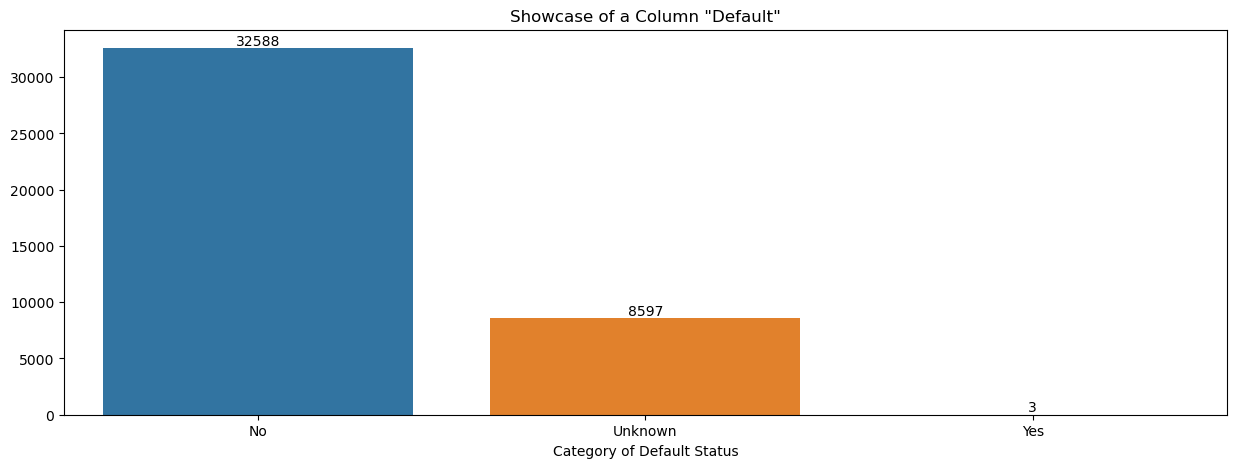

In [167]:
defaultCol_categories = raw_df['default'].unique().tolist()
newdefaultCol_cats = []

for each in defaultCol_categories:
    newEach = each.capitalize()
    newdefaultCol_cats.append(newEach)
    
defaultColReplace_Dict= dict(zip(defaultCol_categories, newdefaultCol_cats))

new_df['default'] = new_df['default'].replace(defaultColReplace_Dict)

# visualization
defaultCount = new_df['default'].value_counts().rename_axis('Category of Default Status').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=defaultCount.index, y=defaultCount.values, order=defaultCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "Default"')
plt.show()

# Kolom Housing

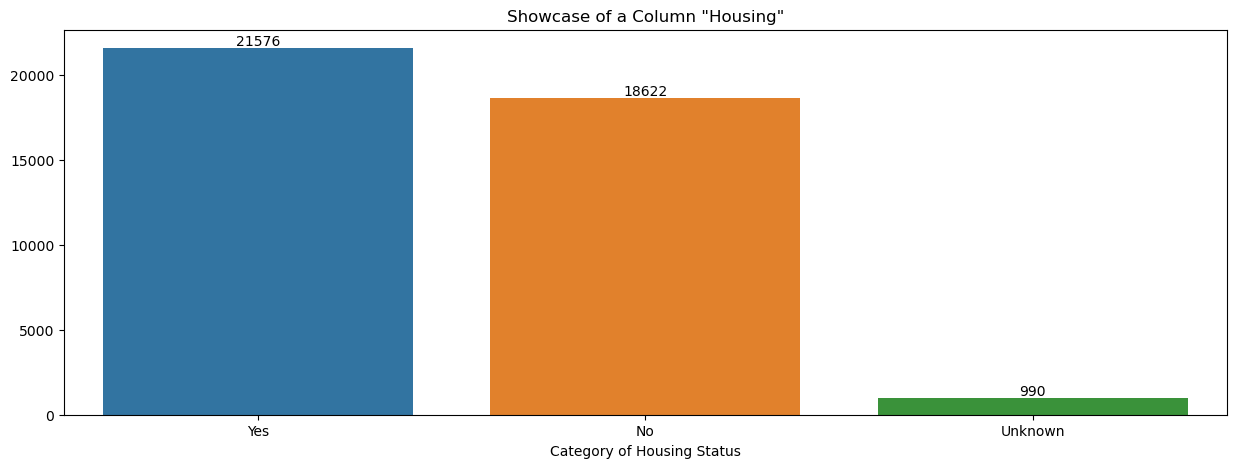

In [168]:
housingCol_categories = raw_df['housing'].unique().tolist()
newhousingCol_cats = []

for each in housingCol_categories:
    newEach = each.capitalize()
    newhousingCol_cats.append(newEach)
    
housingColReplace_Dict= dict(zip(housingCol_categories, newhousingCol_cats))

new_df['housing'] = new_df['housing'].replace(housingColReplace_Dict)

# visualization
housingCount = new_df['housing'].value_counts().rename_axis('Category of Housing Status').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=housingCount.index, y=housingCount.values, order=housingCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "Housing"')
plt.show()

# Kolom Contact

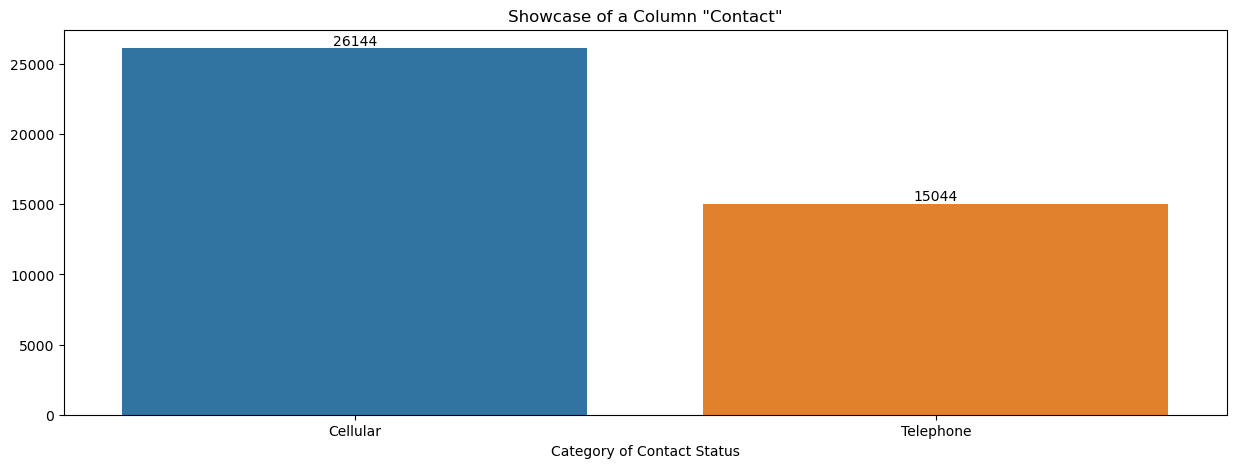

In [169]:
contactCol_categories = raw_df['contact'].unique().tolist()
newcontactCol_cats = []

for each in contactCol_categories:
    newEach = each.capitalize()
    newcontactCol_cats.append(newEach)
    
contactColReplace_Dict= dict(zip(contactCol_categories, newcontactCol_cats))

new_df['contact'] = new_df['contact'].replace(contactColReplace_Dict)

# visualization
contactCount = new_df['contact'].value_counts().rename_axis('Category of Contact Status').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=contactCount.index, y=contactCount.values, order=contactCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "Contact"')
plt.show()

# Kolom Month

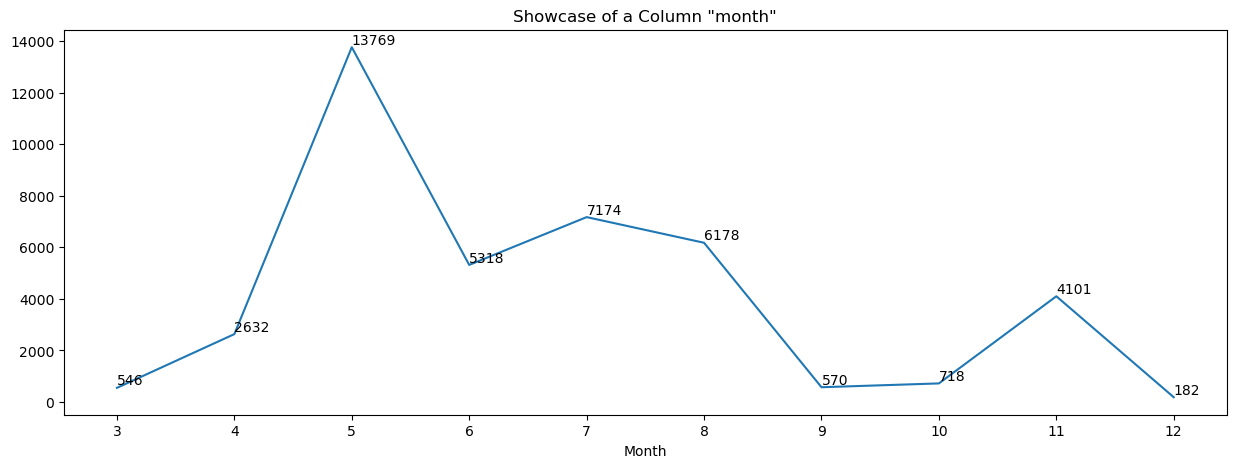

In [170]:
monthCol_categories = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
newmonthCol_cats = [3,4,5,6,7,8,9,10,11,12]
    
monthColReplace_Dict= dict(zip(monthCol_categories, newmonthCol_cats))

new_df['month'] = new_df['month'].replace(monthColReplace_Dict)

# visualization
monthCount = new_df['month'].value_counts().rename_axis('Month').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.lineplot(x=monthCount.index, y=monthCount.values)
for index, count in enumerate(monthCount.values):
    ax.text(x=monthCount.index[index], y=count, s=str(count), ha='left', va='bottom')
plt.title('Showcase of a Column "month"')
plt.xticks(ticks=(range(3,13)))
plt.show()

# Kolom Day_of_week

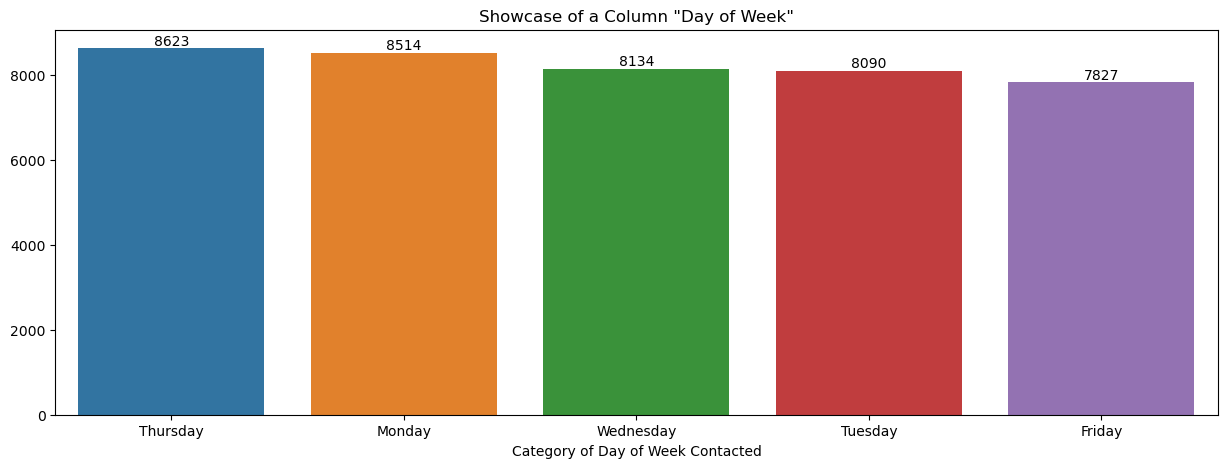

In [171]:
day_of_weekCol_categories = ['mon', 'tue', 'wed', 'thu', 'fri']
newday_of_weekCol_cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

day_of_weekColReplace_Dict= dict(zip(day_of_weekCol_categories, newday_of_weekCol_cats))

new_df['day_of_week'] = new_df['day_of_week'].replace(day_of_weekColReplace_Dict)

# visualization
day_of_weekCount = new_df['day_of_week'].value_counts().rename_axis('Category of Day of Week Contacted').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=day_of_weekCount.index, y=day_of_weekCount.values, order=day_of_weekCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "Day of Week"')
plt.show()

# Kolom POutcome

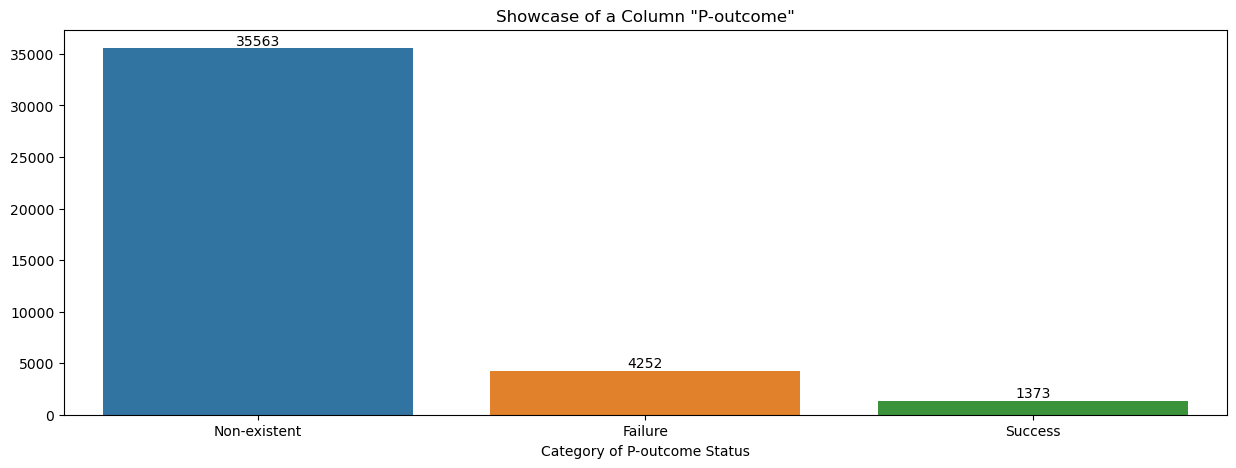

In [172]:
poutcomeCol_categories = raw_df['poutcome'].unique().tolist()
newpoutcomeCol_cats = []

for each in poutcomeCol_categories:
    newEach = each.replace('non', 'non-') if 'non' in each else each
    newEach = newEach.capitalize()
    newpoutcomeCol_cats.append(newEach)
    
poutcomeColReplace_Dict= dict(zip(poutcomeCol_categories, newpoutcomeCol_cats))

new_df['poutcome'] = new_df['poutcome'].replace(poutcomeColReplace_Dict)

# visualization
poutcomeCount = new_df['poutcome'].value_counts().rename_axis('Category of P-outcome Status').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=poutcomeCount.index, y=poutcomeCount.values, order=poutcomeCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "P-outcome"')
plt.show()

# Kolom Y

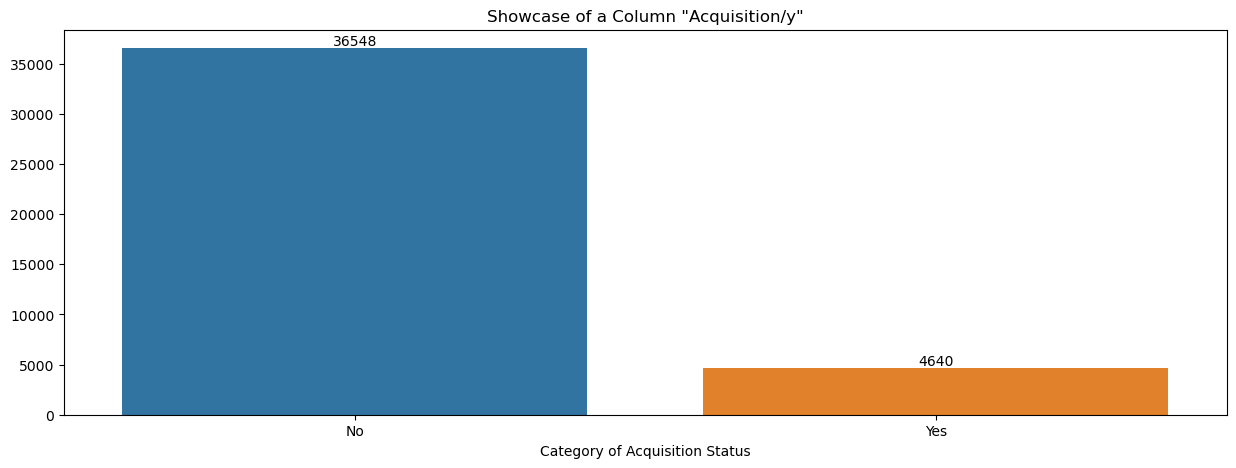

In [173]:
yCol_categories = raw_df['y'].unique().tolist()
newyCol_cats = []

for each in yCol_categories:
    newEach = each.capitalize()
    newyCol_cats.append(newEach)
    
yColReplace_Dict= dict(zip(yCol_categories, newyCol_cats))

new_df['y'] = new_df['y'].replace(yColReplace_Dict)

# visualization
yCount = new_df['y'].value_counts().rename_axis('Category of Acquisition Status').rename('Count')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=yCount.index, y=yCount.values, order=yCount.index[0:5])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Showcase of a Column "Acquisition/y"')
plt.show()